In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('../Final_data/SHP2_train_descriptors_2741.csv')
data

,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,IC50(microM)
0,Cc1nc(cc(=O)n1-c1cccc(Cl)c1Cl)N1CCC2(Cc3ccccc3...,12.992564,-0.169513,12.992564,0.068072,0.609173,455.389,431.197,454.132717,160,...,0,0,0,0,0,0,0,0,0,0.0008
1,N[C@@H]1CCCC11CCN(CC1)c1cnc(Sc2cccc(NC(=O)c3c(...,13.061568,-0.781987,13.061568,0.246174,0.340043,597.145,563.881,596.208486,216,...,0,0,0,0,0,0,0,0,0,0.001
2,N[C@@H]1c2ccccc2CC11CCN(CC1)c1nc(N)c(C2=C(Cl)C...,12.340744,-0.676170,12.340744,0.017202,0.606557,485.419,459.211,484.154515,172,...,0,0,0,0,0,0,0,0,0,0.001
3,N[C@@H]1C[C@H](O)CC11CCN(CC1)c1ncc(Sc2cccc(Cl)...,10.063495,-0.264210,10.063495,0.058620,0.603375,464.422,441.238,463.100037,158,...,0,0,0,0,0,0,0,0,0,0.0012
4,C[C@@H]1OCC2(CCN(CC2)c2ncc(Sc3cccc(Cl)c3Cl)c3n...,6.464779,0.086398,6.464779,0.086398,0.614971,464.422,441.238,463.100037,158,...,0,0,0,0,0,0,0,0,0,0.0015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,CC(C)(C)c1ccc(Oc2ccc(NC(=O)C3=CO[C@@H](O[C@@H]...,13.333207,-1.619179,13.333207,0.045316,0.248676,597.661,558.349,597.257396,232,...,0,0,0,0,0,0,0,0,0,100.0
2737,O=C(O)C1=CO[C@@H](O[C@@H]2O[C@H](COCc3ccccc3)[...,12.516733,-1.051943,12.516733,0.156681,0.076526,824.967,772.551,824.356048,316,...,0,0,0,0,0,0,0,0,0,3.32
2738,CCOS(=O)(=O)/C=C/c1ccc(OCC2=CC[C@@H]3C(C(=O)Nc...,13.462705,-3.710843,13.462705,0.073907,0.112068,679.791,642.495,679.223988,252,...,0,0,0,0,0,0,0,0,0,1.24
2739,CCOS(=O)(=O)/C=C/c1ccc(OCC2=CC[C@@H]3C(C(=O)Nc...,13.659530,-3.730454,13.659530,0.066112,0.099496,793.132,757.852,791.095528,264,...,0,0,0,0,0,0,0,0,0,3.97


In [3]:
np.array(data.columns)

array(['SMILES', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt',
       'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons',
       'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2',
       'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI',
       'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v',
       'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v',
       'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2',
       'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11',
       'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3',
       'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8',
       'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3',
       'SMR_V

# Missing Values

In [4]:
data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
data.shape

(2741, 210)

# Drop Descriptors

## Columns with only single values will be dropped

In [8]:
data['NumRadicalElectrons'].unique()

array([0], dtype=int64)

In [9]:
data['SMR_VSA8'].unique()

array([0.])

In [10]:
data['SlogP_VSA9'].unique()

array([0.])

In [11]:
data['fr_barbitur'].unique()

array([0], dtype=int64)

In [12]:
data['fr_benzodiazepine'].unique()

array([0], dtype=int64)

In [13]:
data['fr_diazo'].unique()

array([0], dtype=int64)

In [14]:
data['fr_dihydropyridine'].unique()

array([0], dtype=int64)

In [15]:
data['fr_epoxide'].unique()

array([0], dtype=int64)

In [16]:
data['fr_isocyan'].unique()

array([0], dtype=int64)

In [17]:
data['fr_isothiocyan'].unique()

array([0], dtype=int64)

In [18]:
data['fr_nitroso'].unique()

array([0], dtype=int64)

In [19]:
data['fr_oxime'].unique()

array([0, 1], dtype=int64)

In [20]:
data['fr_prisulfonamd'].unique()

array([0], dtype=int64)

In [21]:
data['fr_quatN'].unique()

array([0], dtype=int64)

In [22]:
data['fr_thiocyan'].unique()

array([0], dtype=int64)

In [23]:
columns_to_drop = ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_isocyan', 'fr_isothiocyan', 'fr_nitroso', 'fr_oxime', 'fr_prisulfonamd', 'fr_quatN', 'fr_thiocyan']
len(columns_to_drop)

15

In [24]:
data = data.drop(columns_to_drop, axis=1)
data.shape

(2741, 195)

## Columns with more than 95% zeros

In [25]:
columns_to_drop = []

for col in data.columns[1:-1]:
    print(data[col].value_counts())
    percentage = round(data[col].value_counts().iloc[0]*100/2741)
    print(f"% of zeros in {col} : {percentage} %")
    if percentage >= 95:
        columns_to_drop.append(col)
    
    print("\n******************\n")

12.176057    7
12.275698    6
12.130142    6
12.004540    6
13.176570    5
            ..
6.155908     1
6.495600     1
10.661581    1
6.236876     1
4.770824     1
Name: MaxEStateIndex, Length: 1898, dtype: int64
% of zeros in MaxEStateIndex : 0 %

******************

-0.621403    7
-0.010288    6
-1.325086    6
-1.357493    6
 0.072130    4
            ..
-0.597591    1
-2.705376    1
-1.265625    1
-2.689604    1
 0.076959    1
Name: MinEStateIndex, Length: 2126, dtype: int64
% of zeros in MinEStateIndex : 0 %

******************

12.176057    7
12.275698    6
12.130142    6
12.004540    6
13.176570    5
            ..
6.155908     1
6.495600     1
10.661581    1
6.236876     1
4.770824     1
Name: MaxAbsEStateIndex, Length: 1898, dtype: int64
% of zeros in MaxAbsEStateIndex : 0 %

******************

0.155578    7
0.003443    6
0.070126    6
0.002576    4
0.032010    4
           ..
0.030059    1
0.122073    1
0.028234    1
0.008203    1
0.076959    1
Name: MinAbsEStateIndex, Lengt

19.765380     272
5.563451      147
15.921440     104
10.357989     102
11.126903      98
             ... 
34.935401       1
36.171752       1
116.077705      1
52.904127       1
32.383046       1
Name: SlogP_VSA5, Length: 416, dtype: int64
% of zeros in SlogP_VSA5 : 10 %

******************

18.199101    119
22.993638    106
48.530937     82
28.381498     80
29.060005     79
            ... 
23.486014      1
39.543523      1
23.009844      1
52.646966      1
45.609891      1
Name: SlogP_VSA6, Length: 520, dtype: int64
% of zeros in SlogP_VSA6 : 4 %

******************

0.000000     1716
5.022633      505
10.045267     445
10.175743      35
5.153110       23
15.067900      10
4.336329        3
20.090533       2
15.198376       2
Name: SlogP_VSA7, dtype: int64
% of zeros in SlogP_VSA7 : 63 %

******************

0.000000     1245
11.126903     204
5.687386      133
22.290781     107
10.772448      75
             ... 
20.172288       1
5.138974        1
28.268465       1
33.793234     

0    2684
1      57
Name: fr_nitrile, dtype: int64
% of zeros in fr_nitrile : 98 %

******************

0    2590
1     143
2       8
Name: fr_nitro, dtype: int64
% of zeros in fr_nitro : 94 %

******************

0    2592
1     141
2       8
Name: fr_nitro_arom, dtype: int64
% of zeros in fr_nitro_arom : 95 %

******************

0    2670
1      63
2       8
Name: fr_nitro_arom_nonortho, dtype: int64
% of zeros in fr_nitro_arom_nonortho : 97 %

******************

0    2698
1      43
Name: fr_oxazole, dtype: int64
% of zeros in fr_oxazole : 98 %

******************

0    2224
1     377
2     130
3      10
Name: fr_para_hydroxylation, dtype: int64
% of zeros in fr_para_hydroxylation : 81 %

******************

0    2334
1     313
2      67
4      15
3       6
6       3
8       3
Name: fr_phenol, dtype: int64
% of zeros in fr_phenol : 85 %

******************

0    2490
1     164
2      62
4      13
3       6
6       3
8       3
Name: fr_phenol_noOrthoHbond, dtype: int64
% of zeros in

In [26]:
len(columns_to_drop)

39

In [27]:
columns_to_drop

['SMR_VSA2',
 'EState_VSA11',
 'fr_C_S',
 'fr_HOCCN',
 'fr_Imine',
 'fr_N_O',
 'fr_Ndealkylation1',
 'fr_Ndealkylation2',
 'fr_SH',
 'fr_aldehyde',
 'fr_alkyl_carbamate',
 'fr_allylic_oxid',
 'fr_amidine',
 'fr_azide',
 'fr_azo',
 'fr_furan',
 'fr_guanido',
 'fr_hdrzine',
 'fr_imide',
 'fr_ketone',
 'fr_ketone_Topliss',
 'fr_lactam',
 'fr_lactone',
 'fr_morpholine',
 'fr_nitrile',
 'fr_nitro_arom',
 'fr_nitro_arom_nonortho',
 'fr_oxazole',
 'fr_phos_acid',
 'fr_phos_ester',
 'fr_priamide',
 'fr_sulfide',
 'fr_sulfone',
 'fr_term_acetylene',
 'fr_tetrazole',
 'fr_thiazole',
 'fr_thiophene',
 'fr_unbrch_alkane',
 'fr_urea']

# Correlation Analysis

In [28]:
cor = data.corr()
# plt.figure(figsize=(10,6))
# sns.heatmap(cor, annot=True)

In [30]:
estate_indices = data.iloc[:,1:5]
estate_indices

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex
0,12.992564,-0.169513,12.992564,0.068072
1,13.061568,-0.781987,13.061568,0.246174
2,12.340744,-0.676170,12.340744,0.017202
3,10.063495,-0.264210,10.063495,0.058620
4,6.464779,0.086398,6.464779,0.086398
...,...,...,...,...
2736,13.333207,-1.619179,13.333207,0.045316
2737,12.516733,-1.051943,12.516733,0.156681
2738,13.462705,-3.710843,13.462705,0.073907
2739,13.659530,-3.730454,13.659530,0.066112


<AxesSubplot:>

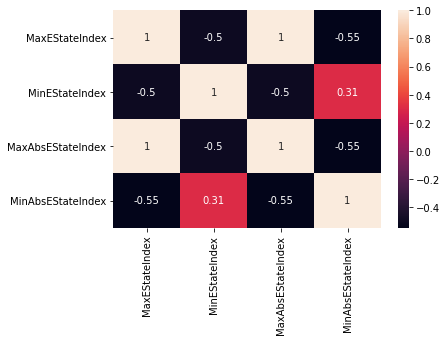

In [31]:
sns.heatmap(estate_indices.corr(), annot=True)

In [32]:
# MaxEStateIndex and MaxAbsEStateIndex are same columns correlation is one
data = data.drop(['MaxAbsEStateIndex'], axis=1)

<AxesSubplot:>

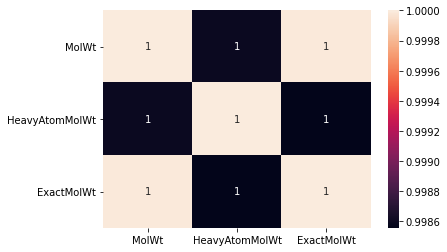

In [33]:
mol_wt = data[['MolWt', 'HeavyAtomMolWt','ExactMolWt']]
sns.heatmap(mol_wt.corr(), annot=True)

In [34]:
# High correaltion so only mol_wt will remain
data = data.drop(['HeavyAtomMolWt','ExactMolWt'], axis=1)

<AxesSubplot:>

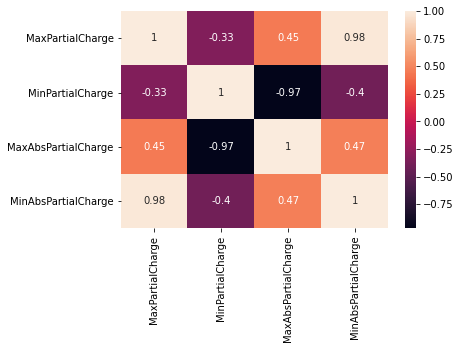

In [35]:
partial_charge = data[['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge']]
sns.heatmap(partial_charge.corr(), annot=True)

In [36]:
data = data.drop(['MaxAbsPartialCharge','MinAbsPartialCharge'], axis=1)

<AxesSubplot:>

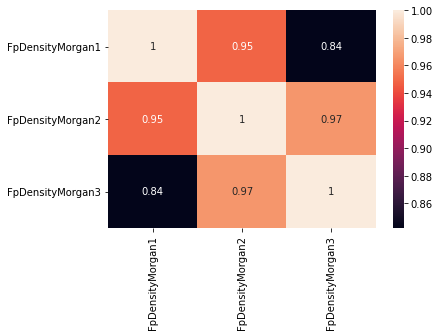

In [37]:
fpdensity = data[['FpDensityMorgan1', 'FpDensityMorgan2',
       'FpDensityMorgan3']]
sns.heatmap(fpdensity.corr(), annot=True)

In [38]:
data = data.drop(['FpDensityMorgan2','FpDensityMorgan3'], axis=1)

<AxesSubplot:>

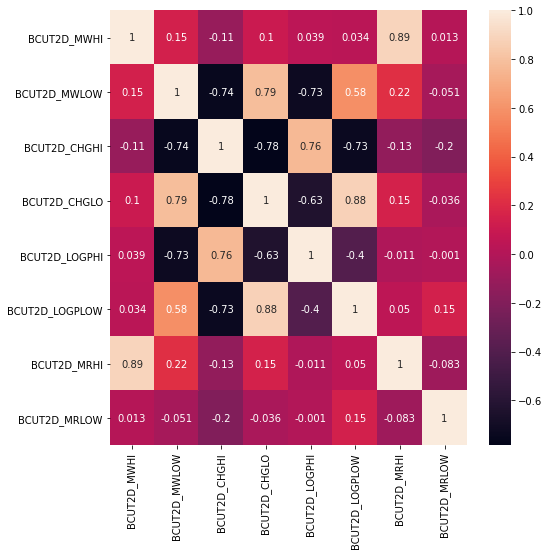

In [39]:
BCUT = data[['BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI',
       'BCUT2D_MRLOW']]
plt.figure(figsize=(8,8))
sns.heatmap(BCUT.corr(), annot=True)

In [40]:
data = data.drop(['BCUT2D_MRHI','BCUT2D_CHGLO'], axis=1)

<AxesSubplot:>

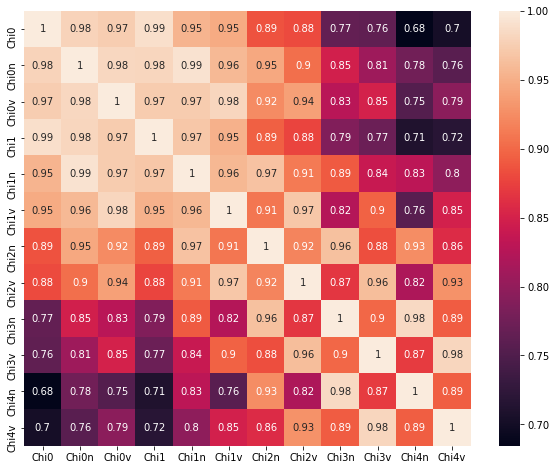

In [41]:
chi = data[['Chi0', 'Chi0n', 'Chi0v',
       'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v',
       'Chi4n', 'Chi4v']]
plt.figure(figsize=(10,8))
sns.heatmap(chi.corr(), annot=True)

In [42]:
data = data.drop(['Chi0n', 'Chi0v',
       'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v','Chi4v', 'Chi3n', 'Chi3v'], axis=1)

<AxesSubplot:>

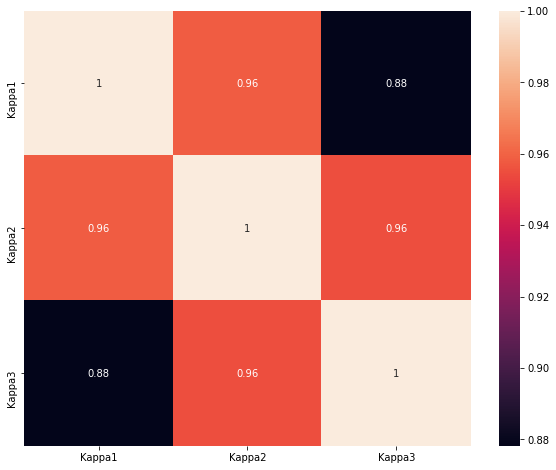

In [43]:
chi = data[['Kappa1', 'Kappa2', 'Kappa3']]
plt.figure(figsize=(10,8))
sns.heatmap(chi.corr(), annot=True)

In [44]:
data = data.drop(['Kappa2','Kappa3'], axis=1)

In [45]:
data.shape

(2741, 174)

In [46]:
#data.to_csv("..\data\shp2_174_descriptor.csv", index=False)

<AxesSubplot:>

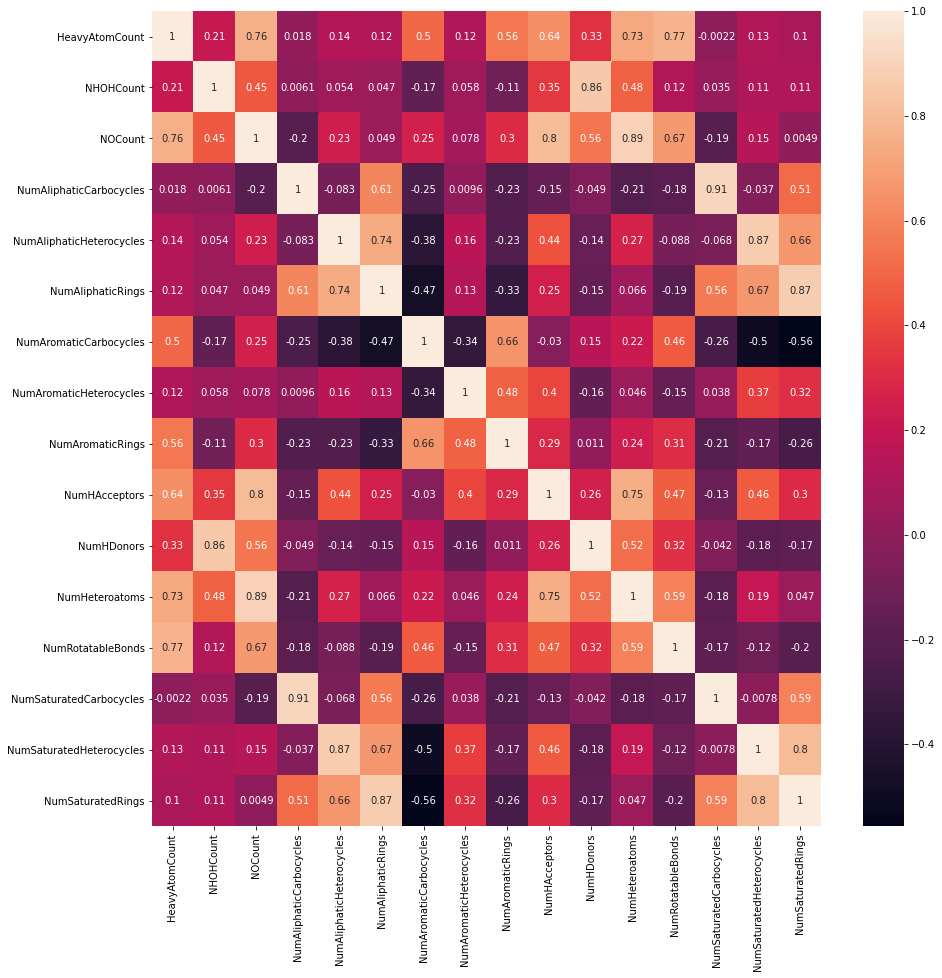

In [47]:
chi = data[['HeavyAtomCount', 'NHOHCount', 'NOCount',
       'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
       'NumAliphaticRings', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles',
       'NumSaturatedRings']]

plt.figure(figsize=(15,15))
sns.heatmap(chi.corr(), annot=True)

In [48]:
data = data.drop(['NumSaturatedRings','NumSaturatedHeterocycles', 'NumSaturatedCarbocycles'], axis=1)

In [49]:
data.shape

(2741, 171)

In [50]:
#data.to_csv('..\data\SHP2_descriptor_171.csv', index=False)

<AxesSubplot:>

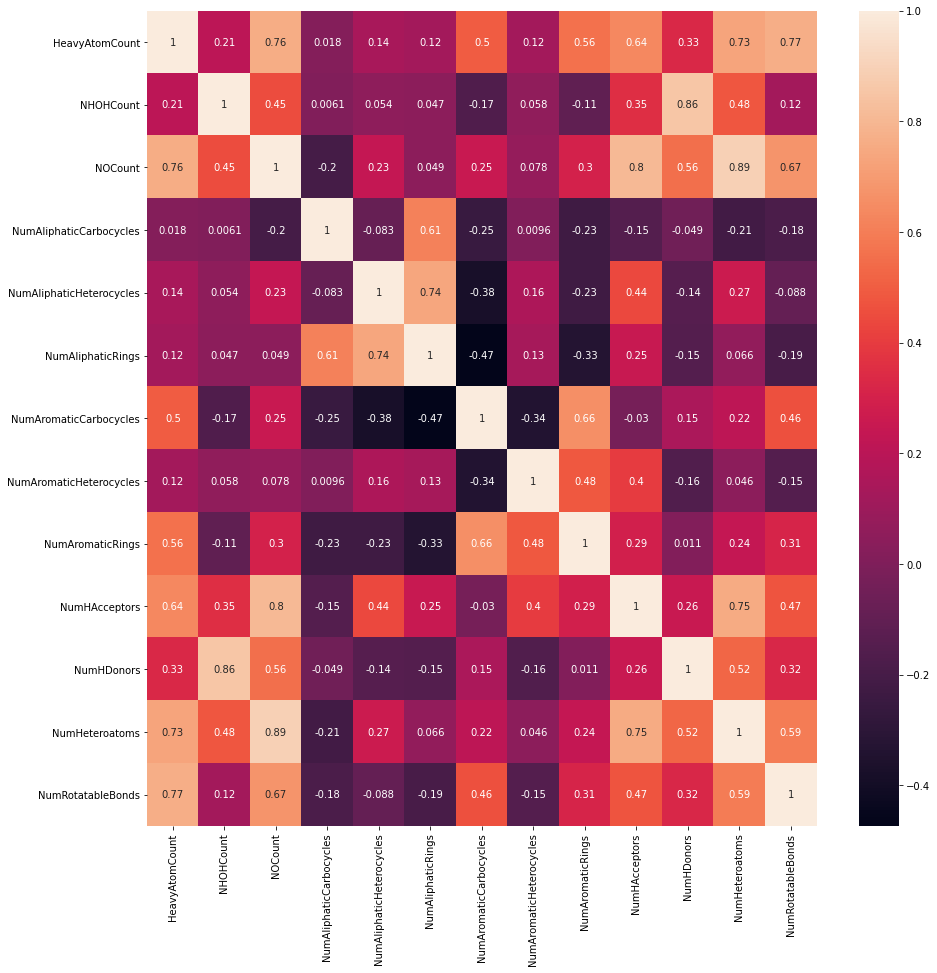

In [51]:
chi = data[['HeavyAtomCount', 'NHOHCount', 'NOCount',
       'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
       'NumAliphaticRings', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds']]

plt.figure(figsize=(15,15))
sns.heatmap(chi.corr(), annot=True)

In [52]:
data = data.drop(['NOCount'], axis=1)

<AxesSubplot:>

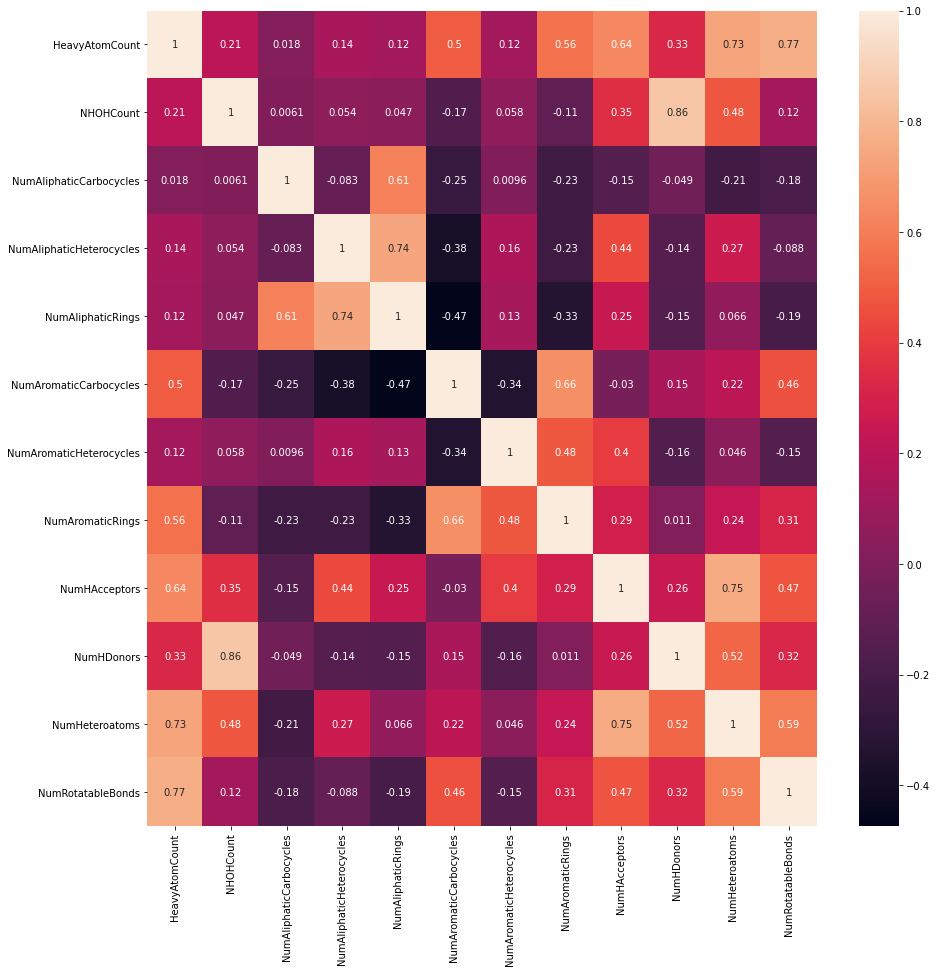

In [53]:
chi = data[['HeavyAtomCount', 'NHOHCount', 
       'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
       'NumAliphaticRings', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds']]
plt.figure(figsize=(15,15))
sns.heatmap(chi.corr(), annot=True)

In [54]:
data.shape

(2741, 170)